# **Prediciting Factory Machine Status**

Name: Myint Kyaw (Marcus) <br>
Admin No: 2409081 <br>
Class: DAAA/FT/1B/04

<hr>

# Projective Objective

Build a supervised machine learning model (*Classification*) to predict whether the machine is working 
properly or faulty.

<hr>

# Background

Determining if a machine is functioning properly is crucial because it ensures safety, efficiency, and cost-effectiveness. A malfunctioning machine can lead to serious safety hazards for operators and anyone nearby, particularly in industries like manufacturing, where operators have to stay close to the machine. Regular monitoring and maintenance will are key to minimize machine breakdowns.

Preventive and predictive maintenance strategies are essential to this process. Preventive maintenance schedules regular check-ups to avoid unexpected failures, while predictive maintenance uses data and analytics to detect early signs of malfunction, allowing for timely intervention. These approaches help prevent costly downtime and maintain quality and consistency in production, which is vital for meeting customer demands and maintaining trust

This is a dataset collected from a manufacturing factory. The dataset contains various 
information on different machines. From the perspective o  quality control, the factor 
wants to build a machine learning model to predict whether the machine is worki g
properly or faul

### Citations
* FieldCircle. (2024). What is Equipment Maintenance? [online] Available at: https://www.fieldcircle.com/blog/equipment-maintenance/.
* Balachandran, J. (2023). Ensuring Reliability and Efficiency: The Value of Preventive Maintenance. [online] Available at: https://www.maintwiz.com/blog/ensuring-reliability-and-efficiency-the-value-of-preventive-maintenance‌y.


<hr>

# Content

1. Importing modules and data
2. Exploratory Data Analysis
3. Data Preprocessing
4. Experimenting with different models
5. Evaluating the models' performance using the testing data
6. Tuning the model for better results
7. Conclusion

<hr>

# 1. Importing modules and data

## Importing Modules

In [2]:
#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Processing and Imputing Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# Model Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import (balanced_accuracy_score, recall_score, f1_score, roc_auc_score, accuracy_score)
from sklearn import tree


In [3]:
#Random Seed Setting
seed = 42

## Importing Data

In [4]:
dataset = pd.read_csv('factory_data.csv', sep=',')
dataset = pd.DataFrame(dataset)
dataset

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


## Meta Data

- Unique ID: the unique identifier
- Product ID: the product ID
- Quality: the machine quality, L = low, M = medium, H = high
- Ambient T: the ambient temperature
- Process T: the process temperature
- Rotation Speed: the machine rotation speed measured in rpm (rounds per minute)
- Torque: the torque of the machine
- Tool Wear: the time of tool wear
- Machine Status: 0 means normal, 1 means abnormal

# 2. Exploratory Data Analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


The dataset contains 20000 rows (entries) and 9 columns (attributes)

In [6]:
print(dataset.isna().sum())

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64


The dataset contains missing values in `Quality`, `Process T (C)` and `Rotation Speed (rpm)` columns

<hr>

### Numerical Features

In [7]:
dataset.drop(["Unique ID", "Machine Status"], axis=1).describe()

,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
count,20000.000000,19600.000000,18812.000000,20000.000000,20000.000000
mean,26.904930,36.904291,1538.795397,39.986910,107.951000
std,2.000834,1.483647,178.674963,9.968684,63.652555
min,22.150000,32.550000,1168.000000,3.800000,0.000000
25%,25.250000,35.750000,1423.000000,33.200000,53.000000
50%,26.950000,36.950000,1503.000000,40.100000,108.000000
75%,28.450000,37.950000,1613.000000,46.800000,162.000000
max,31.450000,40.750000,2886.000000,76.600000,253.000000


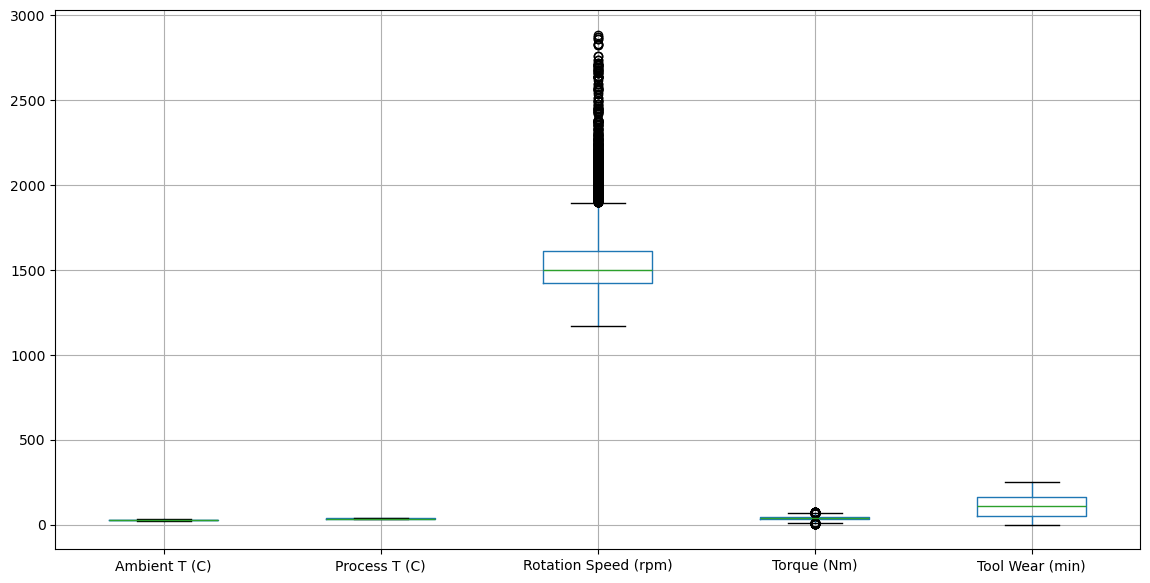

In [8]:
dataset.drop(["Unique ID", "Machine Status"], axis=1).boxplot(figsize=(14,7))
plt.show()

### Box Plot: Variation of Numerical Features

The box plot shows that there are a few outliers, especially in the `Rotation Speed` column. It is also apparent that the scales of the numerical features are different. Most features have a maximum of around 100, but `Rotation Speed` has a maximum of around 2900.

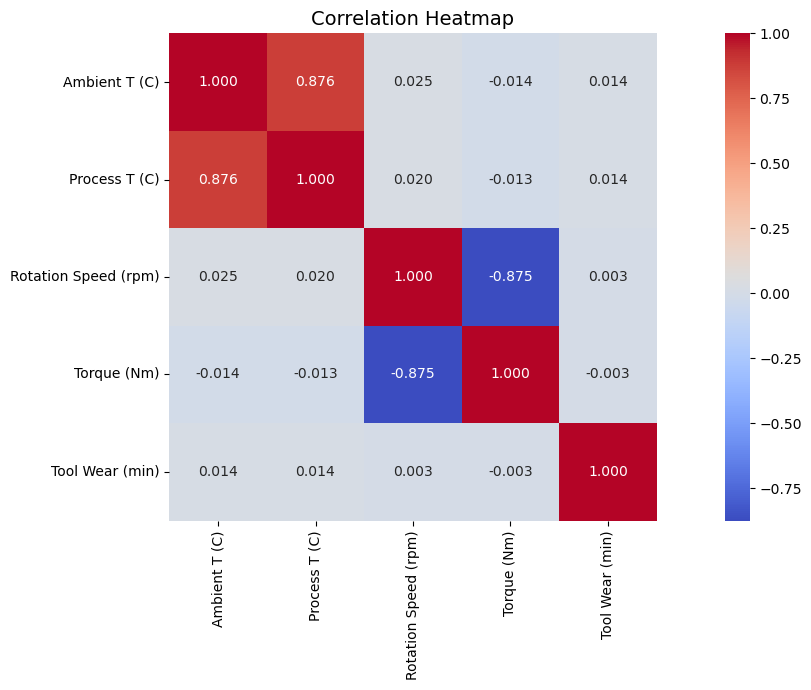

In [10]:
import seaborn as sns

# Drop non-numeric columns and calculate correlation matrix
correlation_matrix = dataset.drop(["Unique ID", "Machine Status", "Product ID", "Quality"], axis=1).corr()

# Set figure size
plt.figure(figsize=(14, 7))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,        # Show correlation values
            fmt=".3f",         # Format values to 3 decimals
            cmap="coolwarm",   # Color map
            cbar=True,         # Show color bar
            square=True)       # Make cells square

plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

### Heat Map: Correlation Between Numerical Features

The heatmap shows a high correlation betweeen `Ambient Temperature` and `Process Temperature` (0.876), and between `Rotation Speed` and `Torque` (-0.875). While the others have low correlation.

<hr>

### Categorical Features

In [13]:
dataset[['Unique ID', 'Product ID', 'Quality', 'Machine Status']]

,Unique ID,Product ID,Quality,Machine Status
0,1,K12965,M,0
1,2,Z62710,L,0
2,3,T20224,L,0
3,4,Z33024,L,0
4,5,Z52839,L,0
...,...,...,...,...
19995,19996,T87335,M,0
19996,19997,Z59525,H,0
19997,19998,T83921,M,0
19998,19999,K42424,H,0


# 3. Data Preprocessing

# 4. Experimenting with different models

# 5. Evaluating the models' performance using the testing data

# 6. Tuning the model for better results

# 7. Conclusion